# Summer Analytics 2020 Capstone Project
## Predicting Employee Attrition in the Dawn of Recession

        
       As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

### Aim of The Competition
    To predict Employee Attrition by the given data about his/her past history.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summeranalytics2020/train.csv
/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv


In [2]:
# importing required librery

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

### importing data

In [3]:
data = pd.read_csv("/kaggle/input/summeranalytics2020/train.csv")
data2 = pd.read_csv("/kaggle/input/summeranalytics2020/test.csv")
data_y = data.Attrition
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [4]:
data.shape

(1628, 29)

In [5]:
data2.shape

(470, 28)

#   





## Data Preprocessing



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       470 non-null    int64 
 1   Age                      470 non-null    int64 
 2   BusinessTravel           470 non-null    object
 3   Department               470 non-null    object
 4   DistanceFromHome         470 non-null    int64 
 5   Education                470 non-null    int64 
 6   EducationField           470 non-null    object
 7   EmployeeNumber           470 non-null    int64 
 8   EnvironmentSatisfaction  470 non-null    int64 
 9   Gender                   470 non-null    object
 10  JobInvolvement           470 non-null    int64 
 11  JobRole                  470 non-null    object
 12  JobSatisfaction          470 non-null    int64 
 13  MaritalStatus            470 non-null    object
 14  MonthlyIncome            470 non-null    i

In [8]:
data.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,2.761671,15.207617,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,2.549995,3.686703,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,1.000000,12.000000,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,14.000000,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,18.000000,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


now we drop column which is not important

In [9]:
data = data.drop(['Id','Attrition','EmployeeNumber','Behaviour'],axis=1)
data2 = data2.drop(['Id','EmployeeNumber','Behaviour'],axis=1)

#   





## Encoding of Column with Objective Datatype

In [10]:
catagory_col = [col for col in data.columns if data[col].dtype=='object']
catagory_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [11]:
for column in data[catagory_col]:
    print(str(column) + str(' : ') + str(data[column].unique()))
    print(data[column].value_counts())
    print('____________________________________________________')
    print('')

BusinessTravel : ['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64
____________________________________________________

Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64
____________________________________________________

EducationField : ['Medical' 'Life Sciences' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64
____________________________________________________

Gender : ['Female' 'Male']
Male      996
Female    632
Name: Gender, dtype: int64
____________________________________________________

JobRole : ['Laboratory Technician' 'Manufacturing Di

In [12]:
# import librery for lable encoding

from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()

for column in catagory_col:
    data[column+'_n'] = l_encoder.fit_transform(data[column])
    data2[column+'_n'] = l_encoder.fit_transform(data2[column])
    data = data.drop([column],axis=1)
    data2 = data2.drop([column],axis=1)

In [14]:
data.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,30,2,3,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,0,1,3,0,2,2,0
1,36,12,4,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,2,1,1,0,4,1,1
2,55,2,1,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,2,2,3,1,7,2,0
3,39,24,1,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,2,1,1,1,6,2,0
4,37,3,3,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,2,1,4,1,4,1,0


In [15]:
data.shape

(1628, 25)

#  





## Standardizing data

In [1]:
# make set ofcolumn required standardizing



In [17]:
# runonly if we want to modeling on nontree based model

""" 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_arr = scaler.fit_transform(data)
data2_arr = scaler.fit_transform(data2)

data = pd.DataFrame(data_arr,columns = data.columns)
data2 = pd.DataFrame(data2_arr,columns = data2.columns)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-17-91165df4ec4f>, line 13)

In [18]:
data.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,30,2,3,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,0,1,3,0,2,2,0
1,36,12,4,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,2,1,1,0,4,1,1
2,55,2,1,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,2,2,3,1,7,2,0
3,39,24,1,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,2,1,1,1,6,2,0
4,37,3,3,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,2,1,4,1,4,1,0


In [19]:
data.shape

(1628, 25)

#   





## outlier detection

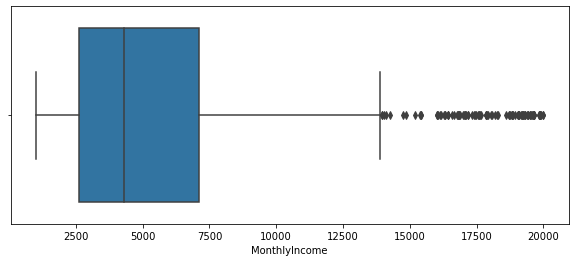

<Figure size 432x288 with 0 Axes>

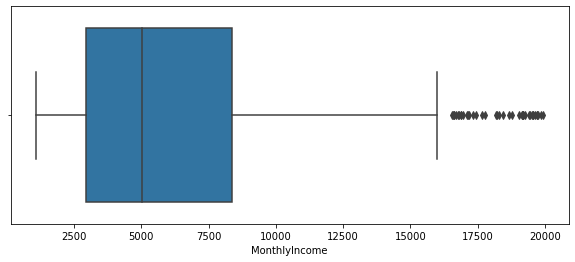

In [20]:
plt.subplots(figsize=(10,4))
sns.boxplot(x=data.MonthlyIncome)
plt.figure()
plt.subplots(figsize=(10,4))
sns.boxplot(x=data2.MonthlyIncome)

both train and test shows same distribution

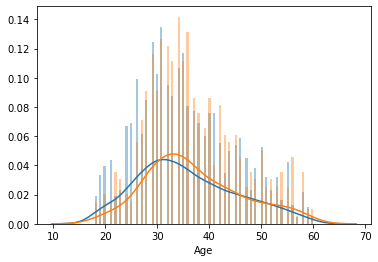

In [21]:
sns.distplot(data.Age,bins=100)
sns.distplot(data2.Age,bins=100)

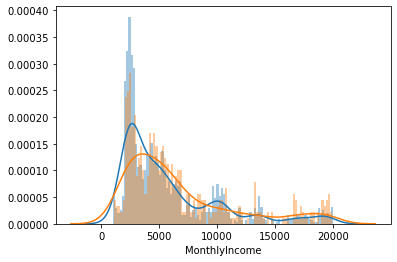

In [22]:
sns.distplot(data.MonthlyIncome,bins=100)
sns.distplot(data2.MonthlyIncome,bins=100)

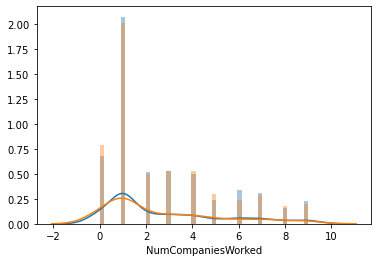

In [23]:
sns.distplot(data.NumCompaniesWorked,bins=50)
sns.distplot(data2.NumCompaniesWorked,bins=50)

#   






## Select Important Features

### we perform feature selection by two method
#### 1) using extra tree classifier
#### 2) by observing coreelation between features

we find corelation tequnique are more accurate

### 1) using extra tree classifier

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
feature = ExtraTreesClassifier()
feature.fit(data,data_y)

score = feature.feature_importances_
score

array([0.0501454 , 0.04060202, 0.03094282, 0.04165327, 0.03469868,
       0.04492827, 0.05421599, 0.03096392, 0.03371671, 0.01558551,
       0.03981534, 0.04889626, 0.03484674, 0.04270712, 0.04338908,
       0.03168181, 0.04056541, 0.03919071, 0.02937665, 0.0299146 ,
       0.03468044, 0.02881164, 0.04365433, 0.04417227, 0.09084502])

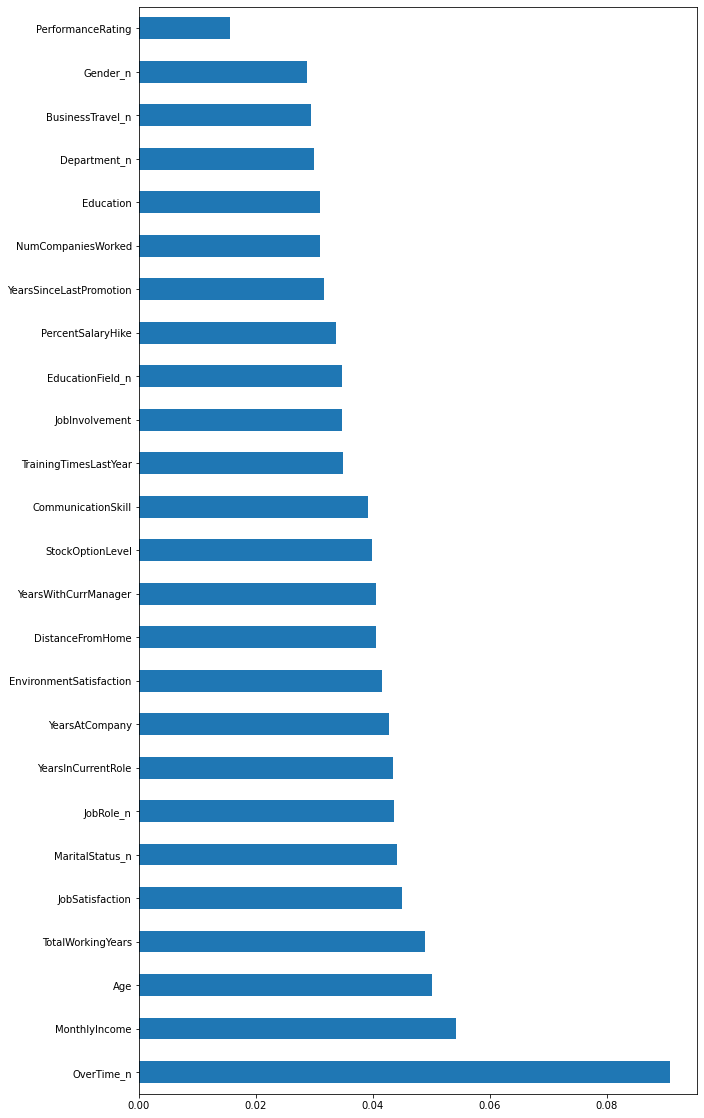

In [25]:
feat_score = pd.Series(score, index=data.columns).sort_values(ascending = False)

plt.figure(figsize=(10,20))
feat_score.plot(kind='barh')
plt.show()

In [26]:
top_feature = list(feat_score.index[0:29])
top_feature

['OverTime_n',
 'MonthlyIncome',
 'Age',
 'TotalWorkingYears',
 'JobSatisfaction',
 'MaritalStatus_n',
 'JobRole_n',
 'YearsInCurrentRole',
 'YearsAtCompany',
 'EnvironmentSatisfaction',
 'DistanceFromHome',
 'YearsWithCurrManager',
 'StockOptionLevel',
 'CommunicationSkill',
 'TrainingTimesLastYear',
 'JobInvolvement',
 'EducationField_n',
 'PercentSalaryHike',
 'YearsSinceLastPromotion',
 'NumCompaniesWorked',
 'Education',
 'Department_n',
 'BusinessTravel_n',
 'Gender_n',
 'PerformanceRating']

In [27]:
feat_score

OverTime_n                 0.090845
MonthlyIncome              0.054216
Age                        0.050145
TotalWorkingYears          0.048896
JobSatisfaction            0.044928
MaritalStatus_n            0.044172
JobRole_n                  0.043654
YearsInCurrentRole         0.043389
YearsAtCompany             0.042707
EnvironmentSatisfaction    0.041653
DistanceFromHome           0.040602
YearsWithCurrManager       0.040565
StockOptionLevel           0.039815
CommunicationSkill         0.039191
TrainingTimesLastYear      0.034847
JobInvolvement             0.034699
EducationField_n           0.034680
PercentSalaryHike          0.033717
YearsSinceLastPromotion    0.031682
NumCompaniesWorked         0.030964
Education                  0.030943
Department_n               0.029915
BusinessTravel_n           0.029377
Gender_n                   0.028812
PerformanceRating          0.015586
dtype: float64

In [28]:
data_imp = data[top_feature]
data2_imp = data2[top_feature]

print(data_imp.shape)
print(data2_imp.shape)

(1628, 25)
(470, 25)


### 2) using correlation between feature

In [29]:
top_corr_feat = []
for i in data.columns:
    if(abs(data_y.corr(data[i]))>=0.01):
        top_corr_feat.append(i)
        
print(top_corr_feat)

['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill', 'BusinessTravel_n', 'Department_n', 'EducationField_n', 'Gender_n', 'JobRole_n', 'MaritalStatus_n', 'OverTime_n']


In [30]:
data_imp = data[top_corr_feat]
data2_imp = data2[top_corr_feat]

print(data_imp.shape)
print(data2_imp.shape)

(1628, 25)
(470, 25)


#    





## test-train split

In [31]:
# train test split

from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(data_imp,data_y,test_size=0.3,random_state=4)

In [32]:
x_train.shape

(1139, 25)

In [33]:
x_test.shape

(489, 25)

#  





## Random Forest Classification

In [34]:
from sklearn.ensemble import RandomForestClassifier as RFS

In [35]:
model = RFS(random_state=24,n_estimators=250,max_depth=20)

#model.fit(x_train,y_train)

model.fit(data_imp,data_y)

RandomForestClassifier(max_depth=20, n_estimators=250, random_state=24)

In [36]:
y_predict_1 = model.predict(x_test)
y_predict_2 = model.predict(data_imp)

In [37]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_predict_1)

1.0

In [38]:
roc_auc_score(data_y,y_predict_2)

1.0

In [39]:
y_prob = model.predict_proba(data2_imp)
y_prob = list(y_prob[:,1])
data2_predict = model.predict(data2_imp)
data2_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [40]:
Id = np.arange(1,len(y_prob)+1)

Id = list(Id)

In [41]:
ans = pd.DataFrame(list(zip(Id,y_prob)),columns=['Id','Attrition'])
ans

,Id,Attrition
0,1,0.072
1,2,0.064
2,3,0.092
3,4,0.164
4,5,0.052
...,...,...
465,466,0.448
466,467,0.812
467,468,0.416
468,469,0.108


In [42]:
ans.to_csv('answer4.csv',index=False)